# Singly Linked Lists

### Do not have indexes!
### Connected via nodes with next pointer
### Random access is not allowed

### Big O
#### Insertion - O(1), Removal - O(N)
#### Searching - O(N), Access - O(N)

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
class Node():
    """Class to create Node of the Singly Linked List"""
    
    def __init__(self, value):
        
        self.value = value
        self.nextnode = None

In [9]:
class SinglyLinkedList:
    """Class to create Singly Linked List"""
    
    def __init__(self):
        self.head = None
        self.tail = None
        self.length = 0

        
    def print_list(self):
        """
        Shows Singly Linked list elements values
        """
        lst = []
        current = self.head
        while current:
            lst.append(current.value)
            current = current.nextnode
        print(lst)
        

    def nodes_connection(self):
        """
        Shows Singly Linked list elements values
        """
        
        lst = []
        current = self.head
        while current:
            if not current.nextnode:
                lst.append([current.value, None])
            else:   
                lst.append([current.value, current.nextnode.value])
            current = current.nextnode
        
        return lst      

    
    def graph(self):
        """
        Builds Singly Linked List graph
        """

        nodes = self.nodes_connection()
        sll_graph = nx.DiGraph()
        counter = 0
        for node in nodes:
            nodename = str(counter) + ': ' + str(node[0])
            sll_graph.add_node(nodename)
            if node[1]:
                next_nodename = str(counter + 1) + ': ' + str(node[1])
                sll_graph.add_node(next_nodename)
                sll_graph.add_edge(nodename, next_nodename)
            counter += 1
        
        print("Nodes of graph: ", sll_graph.nodes())
        nx.draw(sll_graph, with_labels = True)
        
    
    def push(self, value):
        """
        Adds a new node to the end of the
        Singly Linked list. Takes value of new Node
        as an argument. Returns updated list
        """
        # create a new node using value passed
        new_node = Node(value)
        # if there is no head property on the list, set the head
        # and tail to be newly created node
        if not self.head:
            self.head = new_node
            self.tail = self.head
        # otherwise set the next property on the tail to be the new
        # node and set the tail property on the list to be the
        # newly created node
        else:
            self.tail.nextnode = new_node
            self.tail = new_node
        self.length += 1
        return self
    
    


            
    def pop(self):
        """
        Removes a node from the end of the
        Singly Linked list and returns removed node
        """

        # if there are no nodes in the list, return None
        if not self.head:
            return None
        # loop through the list until you reach the tail
        current = self.head
        new_tail = current
        while current.nextnode:
            new_tail = current
            current = current.nextnode
        # set the tail to be the second to last node
        self.tail = new_tail
        # set the next property of the second to last node to None
        self.tail.nextnode = None
        # decrement the length of the list by 1
        self.length -= 1
        if self.length == 0:
            self.head = None
            self.tail = None
        
        return current
    
    
    def shift(self):
        """
        Removes first node of the list and returns
        new list. Doesn't take any arguments
        """
        # if there are no nodes, return None
        if not self.head:
            return None
        # store the current head property in variable
        old_head = self.head
        # set the head propoerty to be the current
        # head's next property
        self.head = old_head.nextnode
        # decrement length by 1
        self.length -= 1
        if self.length == 0:
            self.tail = None        
        return old_head
    
    
    def unshift(self, value):
        """
        Adding a new node to the begginning of the
        Singly Linked list and returns the list. 
        Takes value of new Node as an argument
        """
        
        # create a new node using the value passed to the function
        new_node = Node(value)
        # if there is no head property on the list, set the head and
        # tail to be the newly created node
        if not self.head:
            self.head = new_node
            self.tail = self.head
        # otherwise set the newly created node's next property to be
        # the current head property on the list. set the head property 
        # on the list to be that newly created node
        else:
            new_node.nextnode = self.head
            self.head = new_node
        
        # increment length of the list by 1
        self.length += 1
        
        return self
    
    
    def get(self, index):
        """
        Retrieving a node by it's position in the
        Singly Linked list. Function accept an index as
        an argument
        """
        
        # if the index is less then zero or greater or equal to
        # the length of the list, return None
        if index < 0 or index >= self.length:
            return None
        
        counter = 0
        current_node = self.head
        # loop through the list until you reach the index and
        # return the node at that specific index
        while counter != index:
            current_node = current_node.nextnode
            counter += 1
            
        return current_node
            
        
    def set_value(self, index, value):
        """
        Changing the value of a node based on it's position in the
        Singly Linked List. Function accepts a value and index 
        as arguments. Returns True or False
        """
        
        # use get function to find the specific node
        found_node = self.get(index)
        # if the node is not found, return False
        if not found_node:
            return False
        # if the node is found, set the value of that node to be
        # the value passed to the function and return True
        found_node.value = value
        return True
        
        
    def insert(self, index, value):
        """
        Adding a node to the Singly Linked List
        at specific position
        """
        
        # if the index is less then zero or greater than
        # the length of the list, return False
        if index < 0 or index > self.length:
            return False
        # if the index is the same as the length, push a new
        # node to the end of the list
        elif index == self.length:
            self.push(value)
            return True
        # if the index is 0, unshift a new node to the start
        # of the list
        elif index == 0:
            self.unshift(value)
            return True
        # otherwise 
        else:
            new_node = Node(value)
            # using get method, access the node at the 'index-1'
            previous_node = self.get(index-1)
            # set the next property on that node to be the new node
            tmp = previous_node.nextnode
            previous_node.nextnode = new_node
            # set the next property on the new node to be the previos next
            new_node.nextnode = tmp
            # increment length
            self.length += 1            
            return True
        
        
    def remove(self, index):
        """
        Removing a node from the Singly Linked list
        at a specific position. Returns the removed node
        """
        
        # if the index is less then zero or greater or equal to
        # the length of the list, return None
        if index < 0 or index >= self.length:
            return None
        # if the index is the same as the length-1, pop
        # the node from the end of the list
        elif index == self.length - 1:
            return self.pop()
        # if the index is 0, shift a node from the start
        # of the list
        elif index == 0:
            return self.shift()
        # otherwise 
        else:
            # using get method, access the node at the 'index-1'
            previous_node = self.get(index-1)
            removed_node = previous_node.nextnode
            # set the next property on that node to be the next
            # of the next node
            previous_node.nextnode = removed_node.nextnode
            # decrement length
            self.length -= 1
            return removed_node
        
    
    def reverse(self):
        """
        Reversing the Singly Linked List in place. 
        Returns reversed list
        """

        # create variable called current_node and initialize it
        # to the head property
        current_node = self.head
        # swap the head and tail
        self.tail, self.head = self.head, self.tail
        # create variable called previous_node
        previous_node = None
        # create variable called next_node
        next_node = None
        # loop through the list
        while current_node:
            # set next_node to be the next property on whatever node is
            next_node = current_node.nextnode
            # set the next property  on the current_node to be 
            # whatever previous node is
            current_node.nextnode = previous_node
            # set previous_node to be the value of the current_node variable
            previous_node = current_node
            # set the current_node variable to be the value of next variable
            current_node = next_node
            
        return self

In [10]:
lst = SinglyLinkedList()
lst.push('Hello')
lst.push('Goodbye')
lst.push('GoodMoring')
lst.push('!')

In [11]:
lst.print_list()

['Hello', 'Goodbye', 'GoodMoring', '!']


Nodes of graph:  ['0: Hello', '1: Hello', '2: Goodbye', '3: GoodMoring', '4: !']


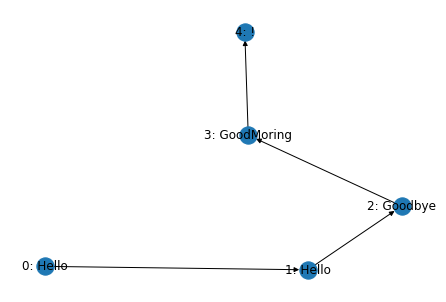

In [18]:
lst.graph()

In [17]:
lst.unshift('Hello')

Nodes of graph:  ['node1', 'node2', 'node3']


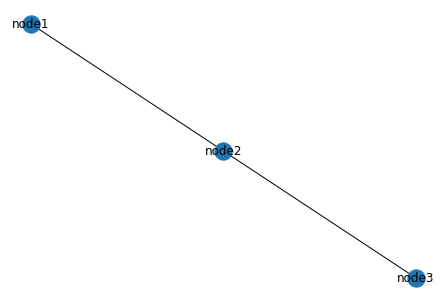

In [21]:
sll_graph = nx.Graph()

sll_graph.add_node('node1')

# sll_graph.add_node(next_nodename)
sll_graph.add_edge('node1', 'node2')

sll_graph.add_edge('node2', 'node3')
print("Nodes of graph: ", sll_graph.nodes())
nx.draw(sll_graph, with_labels = True)